<a href="https://colab.research.google.com/github/SergeyHSE/LinearRegressor.github.io/blob/main/LinearRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

id - a unique identifier for each trip

vendor_id - a code indicating the provider associated with the trip record

pickup_datetime - date and time when the meter was engaged

dropoff_datetime - date and time when the meter was disengaged

passenger_count - the number of passengers in the vehicle (driver entered value)

pickup_longitude - the longitude where the meter was engaged

pickup_latitude - the latitude where the meter was engaged

dropoff_longitude - the longitude where the meter was disengaged

dropoff_latitude - the latitude where the meter was disengaged

store_and_fwd_flag - This flag indicates whether the trip record was held in
vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

trip_duration - duration of the trip in seconds

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import datetime

In [2]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [4]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c nyc-taxi-trip-duration

 94% 81.0M/85.8M [00:00<00:00, 99.4MB/s]
100% 85.8M/85.8M [00:00<00:00, 97.6MB/s]


In [17]:
import zipfile

with zipfile.ZipFile('nyc-taxi-trip-duration.zip', 'r') as z:
    with z.open('train.zip') as f:
        df = pd.read_csv(f, compression='zip', header=0, sep=',', quotechar='"')

In [18]:
df = df.drop('dropoff_datetime', axis=1)
df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [8]:
# Now the dates are written as strings. Let's convert them into python datetime objects.
# This way we will be able to perform arithmetic operations with dates and pull out the necessary information without working with strings.
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)

In [19]:
df = df.sort_values(by='pickup_datetime')

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

#sort date
df = df.sort_values(by='pickup_datetime')

In [20]:
# Let's look at count of passanger by day of week
# Extract day of the week

df['day_of_week'] = df['pickup_datetime'].dt.day_name()

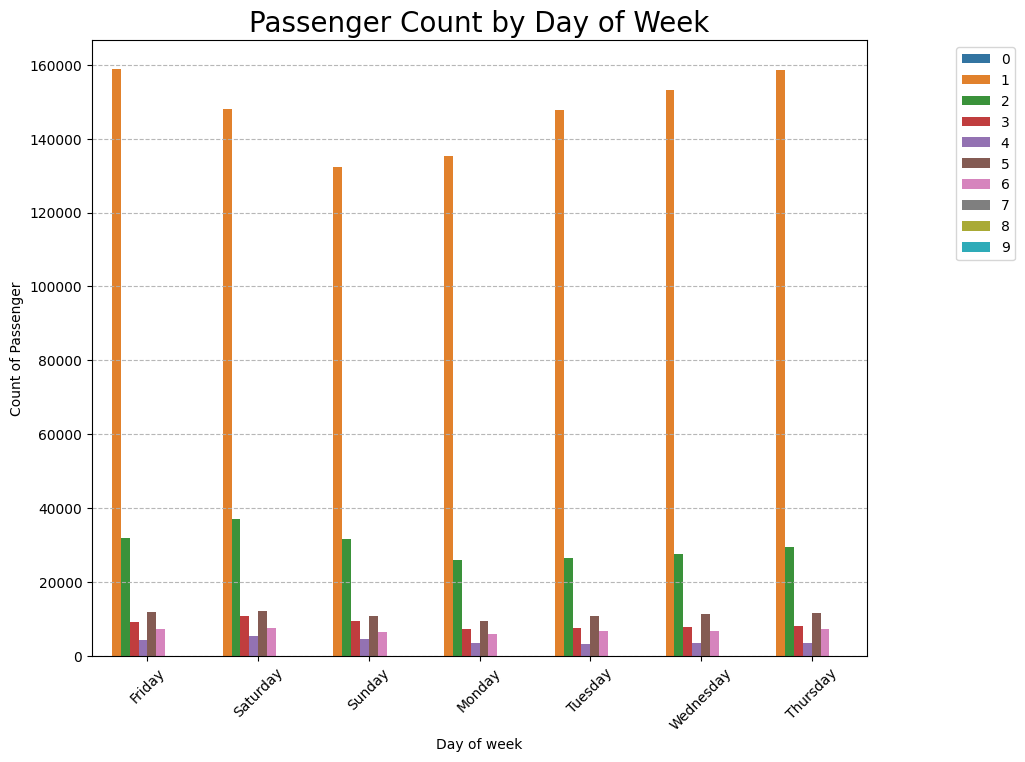

In [11]:
# Create a countplot
plt.figure(figsize=(10, 8), dpi=100)
ax = sns.countplot(x='day_of_week', data=df, hue='passenger_count')
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.xlabel('Day of week')
plt.ylabel('Count of Passenger')
plt.title('Passenger Count by Day of Week', fontsize=20)
plt.xticks(rotation=45)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

In [21]:
df['month'] = df['pickup_datetime'].dt.month
df['hour'] = df['pickup_datetime'].dt.hour

<Figure size 1200x800 with 0 Axes>

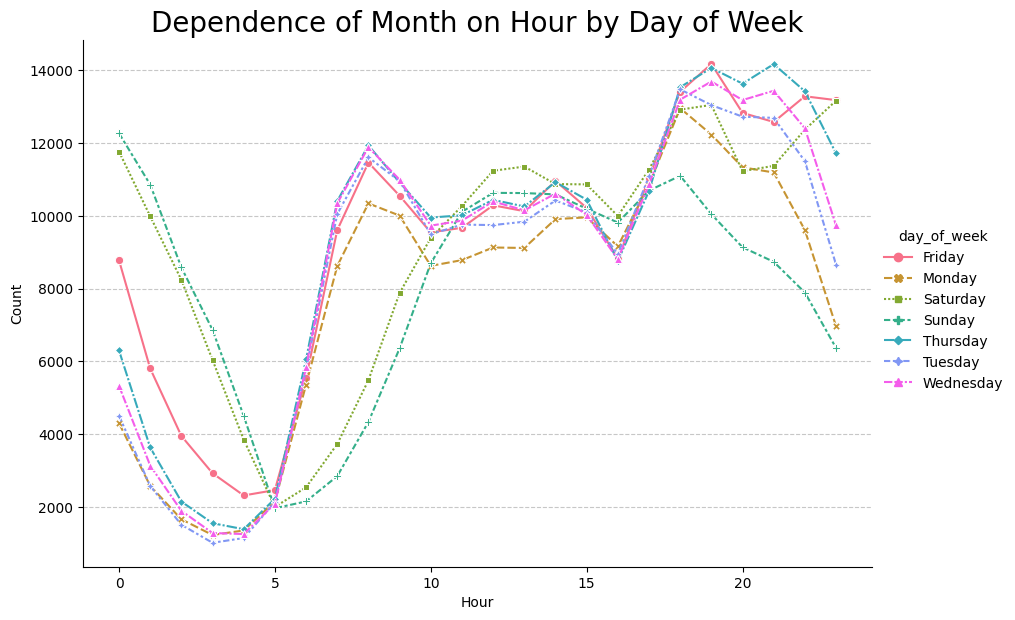

In [22]:
# Create a line plot

plt.figure(figsize=(12, 8), dpi=100)
sns.set_palette("husl")
sns.relplot(
    hue='day_of_week',
    x='hour',
    y='month',
    data=df.groupby(['day_of_week', 'hour']).count().reset_index(),
    kind='line',
    aspect=1.5,
    height=6,
    style='day_of_week',
    markers=True,
)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Dependence of Month on Hour by Day of Week', fontsize=20)
#plt.legend(title='Day of Week', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

<Figure size 1200x800 with 0 Axes>

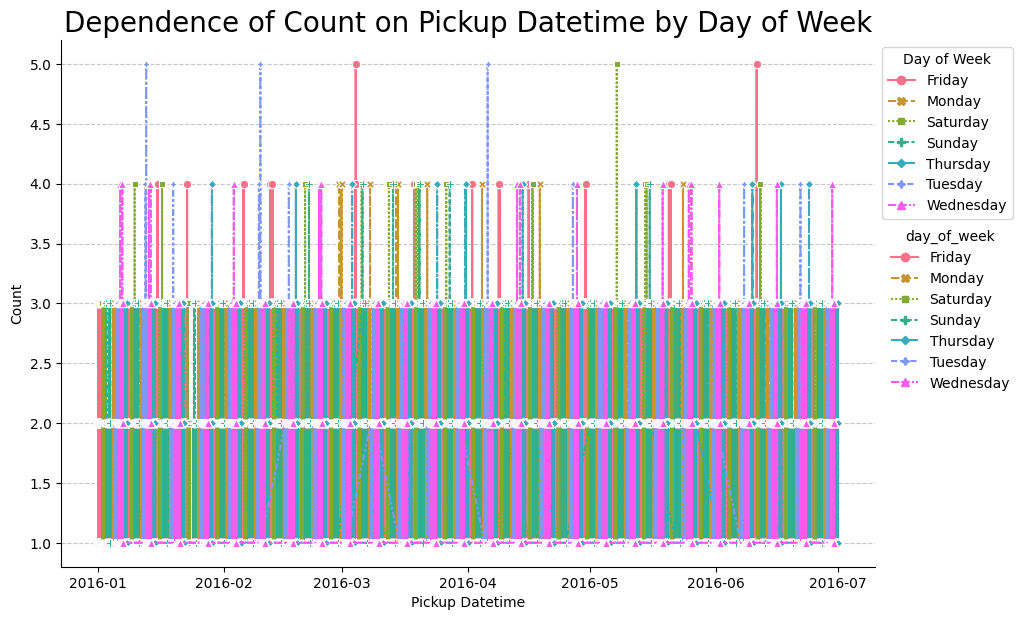

In [14]:
grouped_df = df.groupby(['day_of_week', 'pickup_datetime']).size().reset_index(name='count')

plt.figure(figsize=(12, 8), dpi=100)
sns.set_palette('husl')
sns.relplot(
    hue='day_of_week',
    x = 'pickup_datetime',
    y = 'count',
    data = grouped_df,
    kind='line',
    aspect = 1.5,
    height = 6,
    style = 'day_of_week',
    markers=True,
)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Pickup Datetime')
plt.ylabel('Count')
plt.title('Dependence of Count on Pickup Datetime by Day of Week', fontsize=20)
plt.legend(title='Day of Week', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()